# | Titanic Survivor Prediction |
##### Using numpy, pandas, seaborn, along with sklearn (Neighbor, SVC Linear, SVC RBF, Gaussian NB, Decision Trees, and Random Forrest Trees) a model is created that can predict the survivability of an individual.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### All the necessary libraries are imported before any action can be taken.

## Load Dataset

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head(10) #Print head (10) rows to see the data.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


##### The data set is loaded using a seaborn function and the first 10 rows are printed in order to confirm that the data is loaded correctly and also to view the organization of the data itself.

## Initial dataset manipulation.
##### In this section we superficially explore the data to orient our strategy. 
 

### We get the shape and info of the dataset.

In [3]:
titanic.shape #Count number of rows and columns in data.

(891, 15)

In [4]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


##### We see the total entries for each column, total columns, and the dtype.

### Find Missing Values

##### Using the combination of .isna and .sum we return the column name and the total NaN values.

In [5]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### We further inquire on the type of data in out columns; look at all values in each columns, obtain the sum.

In [6]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

#### Clean Dataset

In [7]:
titanicDf = titanic.dropna()

##### Using .dropna() we eliminate all the rows with null values.

## Data Exploration

##### We dive deeper in our exploration and now obtain relevant statistics of our dataset.

In [8]:
#Obtain some basic stats of the dataframe.
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Using the describe() function we get the standard deviation, mean, median, minimum and maximum value among others. The describe function only works in columns with numerical values.


### Number of Survivors

In [9]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

###### We see that only 342 individuals survived the tragedy.

#### Bar Plot of survivors

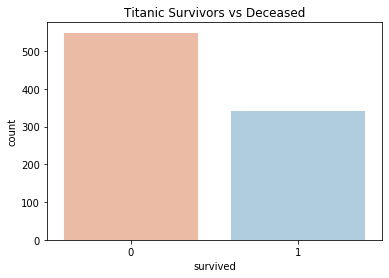

In [10]:
ax = plt.axes()
sns.countplot(titanic['survived'], ax = ax, palette="RdBu")
ax.set_title("Titanic Survivors vs Deceased")
plt.show()

#### Visualization the sum of survivors for cols: who, sex, pclass, sib, parch, and embarck.

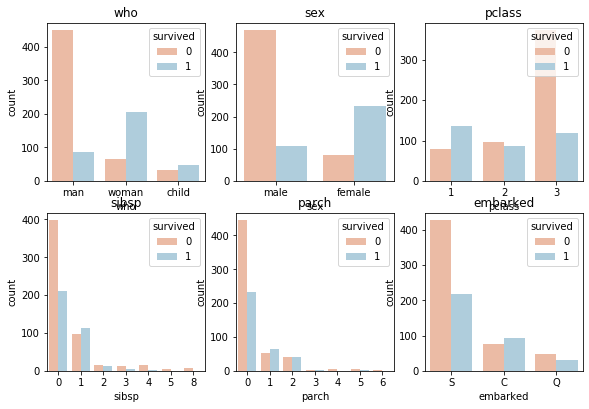

In [11]:
def simpleBarPlots(dF, colNames, label, nRows, nCols):
    fig, axs = plt.subplots(nRows, nCols, figsize = (nCols * 3.2, nRows * 3.2) )
    for r in range(0, nRows):
        for c in range (0, nCols):
            i = r*nCols + c #index to go through the num of columns
            ax = axs[r][c] #show where to pos subplt
            #print(i)
            sns.countplot(dF[colNames[i]], hue = dF[label], ax = ax, palette="RdBu")
            ax.set_title(colNames[i])
            ax.legend(title = label, loc = 'upper right')
    plt.tight_layout

simpleBarPlots(titanic, ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked'], 'survived', 2, 3)
    
    

###### After seeing the initial plots its observed that it's necessary to obtain more in depth stats.

### Survival Rates (by sex, class, and fare).
#### SurvivalRate by sex

In [12]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


###### We see that female survivability is substantially larger than the male survivability, probably due to contemporary maritime law and customs.

#### Survival rate by class

In [13]:
titanic.pivot_table('survived', index = 'sex', columns ='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Survival rate by sex and class.

In [14]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

###### The ages are divided in threee categories: -17, 18-79, 80+

#### Plot of Survival Rate

Text(0.5, 1.0, 'Survival Rate by Fare and Class')

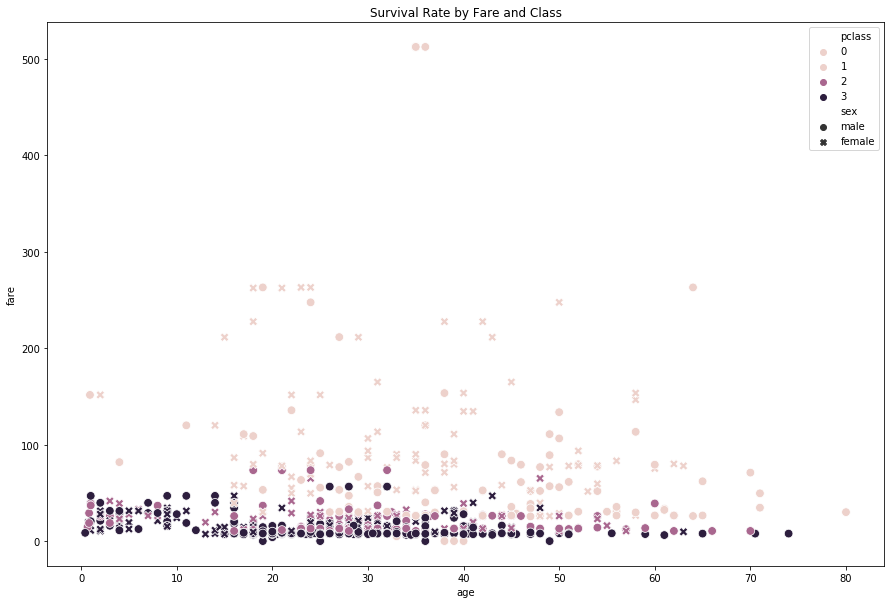

In [15]:
plt.figure(figsize=(15, 10))
ax1 = plt.axes()
ax1 = sns.scatterplot(data=titanic, x="age", y="fare", hue="pclass", s=75, style="sex", ax =ax1)
ax1.set_title("Survival Rate by Fare and Class")

#### Aditional Plots

Text(0.5, 1.0, 'Survivability by Sex')

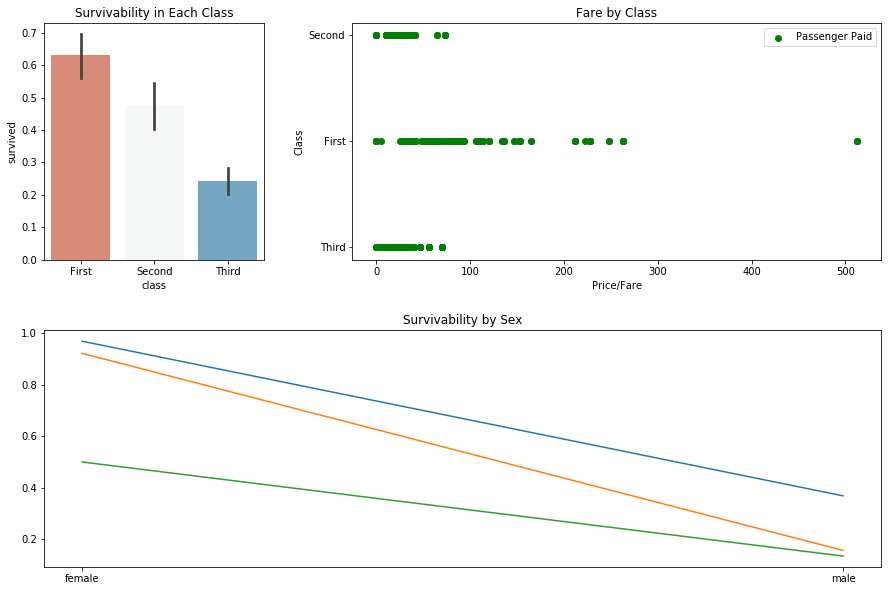

In [16]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.figure(figsize=(15, 10))

ax2_1 = plt.subplot(grid[0, 0])
ax2_1 = ax2 = sns.barplot(x = 'class', y = 'survived', data = titanic, palette="RdBu")
plt.title('Survivability in Each Class')

a2_2 = plt.subplot(grid[0, 1:])
a2_2 = ax2 = plt.scatter(titanic['fare'], titanic['class'], color = 'green', label = 'Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/Fare')
plt.title('Fare by Class')
plt.legend()

ax2_3 = plt.subplot(grid[1, :3])
ax2_3 = plt.plot(titanic.pivot_table('survived', index = 'sex', columns ='class'))
plt.title('Survivability by Sex')

### Preprarig Data for Machine Learning Model training.
##### Before the modeles can be created and the training can comence, the data must be modified, split, and scaled.
#### We drop all columns and rows with NaN values, 

In [17]:
# Remove the rows with missing values.
titanic = titanic.dropna(subset = ['embarked', 'age'])

In [18]:
# We drop selected columns.
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis =1)

In [19]:
# Newshape
titanic.shape

(712, 8)

In [20]:
#look at the data types; must change non-numeric types to numeric values.
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [21]:
#Print unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the "Sex" column.
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values) 

#Encode tehe embark column.
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)# 2 = pos in titanic.dtypes

In [23]:
#new vals
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [24]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

#### Split the data into independent 'x' and dependant 'y' variable.

In [25]:
X = titanic.iloc[:, 1:8].values #we start at 1 because 0 is survived.
Y = titanic.iloc[:, 0].values 

#### Split dataset into 80% train and %20 test

In [26]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, random_state=0)

#### Scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.fit_transform(Xtest)

### Create function with many Machine Learning Models

In [28]:
def models(Xtrain, Ytrain):
    #use Log reg
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(Xtrain, Ytrain)
    
    #use Knieghbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(Xtrain, Ytrain)
    
    #use svc linear kernel
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(Xtrain, Ytrain)
    
    #use svc rbfkernel
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(Xtrain, Ytrain)
    
    #use Gaussian
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(Xtrain, Ytrain)
    
    #use deciison tree
    from sklearn.tree import DecisionTreeClassifier
    trees = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    trees.fit(Xtrain, Ytrain)
    
    #use the random foresst class
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion= 'entropy', random_state = 0)
    forest.fit(Xtrain, Ytrain)
    
    #print train accuracy for each model 
    print('[0]Logistic Regression Training Accuracy: ', log.score(Xtrain, Ytrain))
    print('[1]K Neighbors Training Accuracy: ', knn.score(Xtrain, Ytrain))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(Xtrain, Ytrain))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(Xtrain, Ytrain))
    print('[4]Gaussian NB  Training Accuracy: ', gauss.score(Xtrain, Ytrain))
    print('[5]Decision Trees Training Accuracy: ', trees.score(Xtrain, Ytrain))
    print('[6]Random Forrest Training Accuracy: ', forest.score(Xtrain, Ytrain))
    return log, knn, svc_lin, svc_rbf, gauss, trees, forest

### Get and train models

In [29]:
model = models(Xtrain, Ytrain)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]K Neighbors Training Accuracy:  0.8664323374340949
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.8506151142355008
[4]Gaussian NB  Training Accuracy:  0.8031634446397188
[5]Decision Trees Training Accuracy:  0.9929701230228472
[6]Random Forrest Training Accuracy:  0.9753954305799648


C:\Users\jmoli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Create confusion matrix and accuracy on all models on the test data.

In [30]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Ytest, model[i].predict(Xtest))
    #extract TrueNeg, false pos,fals neg, true pos
    TN, FP, FN, TP = confusion_matrix(Ytest, model[i].predict(Xtest)).ravel()
    score = (TP+TN)/(TP+TN+FN+FP)
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i,score))
    print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



### Get Features of Importance.

In [31]:
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)} ) 
importances = importances.sort_values('importance', ascending =False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


### Visualize the importances.

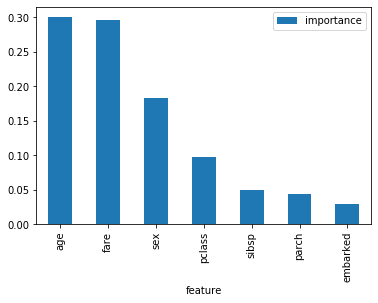

In [32]:
importances.plot.bar()

### Prediction

In [33]:
#Print the prediction of Random Forrest Class
pred = model[6].predict(Xtest)
print(pred)
print()

#Print the actual values
print(Ytest)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


### Test
##### We define a function that allows us to predict the survivability of an individual.

In [34]:
def predictionTitanic(pclass, sex, age, sibsp, parch, fare, embarked):
    mysurvival = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    #scaling my survival
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    mysurvivalscaled = sc.fit_transform(mysurvival)
    #print pred f my survivial using random forest class

    pred = model[6].predict(mysurvivalscaled)

    if pred == 0:
        print("I'm sorry, you died.")
    else:
        print("Congrats you lived!")


#### Prediction

In [35]:
predictionTitanic(1,0,1,1,1,1000,0)

I'm sorry, you died.
